In [ ]:
!tar -xvzf lines.tgz

Streaming output truncated to the last 5000 lines.
j06/j06-034/j06-034-06.png
j06/j06-034/j06-034-07.png
j06/j06-034/j06-034-08.png
j06/j06-034/j06-034-09.png
j06/j06-034/j06-034-10.png
j06/j06-051/
j06/j06-051/j06-051-00.png
j06/j06-051/j06-051-01.png
j06/j06-051/j06-051-02.png
j06/j06-051/j06-051-03.png
j06/j06-051/j06-051-04.png
j06/j06-051/j06-051-05.png
j06/j06-051/j06-051-06.png
j06/j06-051/j06-051-07.png
j06/j06-051/j06-051-08.png
j06/j06-051/j06-051-09.png
j06/j06-051/j06-051-10.png
j06/j06-056/
j06/j06-056/j06-056-00.png
j06/j06-056/j06-056-01.png
j06/j06-056/j06-056-02.png
j06/j06-056/j06-056-03.png
j06/j06-056/j06-056-04.png
j06/j06-056/j06-056-05.png
j06/j06-056/j06-056-06.png
j06/j06-056/j06-056-07.png
j06/j06-056/j06-056-08.png
j06/j06-056/j06-056-09.png
j06/j06-056/j06-056-10.png
j07/
j07/j07-000/
j07/j07-000/j07-000-00.png
j07/j07-000/j07-000-01.png
j07/j07-000/j07-000-02.png
j07/j07-000/j07-000-03.png
j07/j07-000/j07-000-04.png
j07/j07-000/j07-000-05.png
j07/j07-000/j0

In [ ]:
!tar -xvzf ascii.tgz

./
forms.txt
lines.txt
words.txt
sentences.txt


In [ ]:
line_labels = {}

with open("lines.txt", "r") as f:
    for line in f:
        if line.startswith("#"): continue
        parts = line.strip().split()
        if len(parts) < 9 or parts[1] != "ok": continue
        img_id = parts[0]
        label = " ".join(parts[8:])
        line_labels[img_id] = label


In [ ]:
from glob import glob
import os
import shutil

all_imgs = sorted(glob("**/*.png", recursive=True))
print("Found", len(all_imgs), "images")

img_dict = {os.path.splitext(os.path.basename(p))[0]: p for p in all_imgs}

os.makedirs("train_data/rec/train", exist_ok=True)
copied, skipped = 0, 0

with open("train_data/rec/rec_gt_train.txt", "w", encoding="utf-8") as f:
    for img_id, label in line_labels.items():
        if img_id not in img_dict:
            skipped += 1
            continue
        img_path = img_dict[img_id]
        new_path = f"train_data/rec/train/{img_id}.png"
        shutil.copy(img_path, new_path)
        f.write(f"{new_path}\t{label}\n")
        copied += 1

print(f"Copied: {copied}, Skipped: {skipped}")


Found 13353 images
Copied: 11344, Skipped: 0


In [ ]:
import pandas as pd

rows = []

with open("train_data/rec/rec_gt_train.txt", "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("\t", 1)
        if len(parts) == 2:
            img_path, label = parts
            rows.append((img_path, label))

df = pd.DataFrame(rows, columns=["img_path", "label"])
df.head()

,img_path,label
0,train_data/rec/train/a01-000u-00.png,A|MOVE|to|stop|Mr.|Gaitskell|from
1,train_data/rec/train/a01-000u-01.png,nominating|any|more|Labour|life|Peers
2,train_data/rec/train/a01-000u-02.png,is|to|be|made|at|a|meeting|of|Labour
3,train_data/rec/train/a01-000u-04.png,put|down|a|resolution|on|the|subject
4,train_data/rec/train/a01-000u-06.png,"Griffiths|,|M P|for|Manchester|Exchange|."


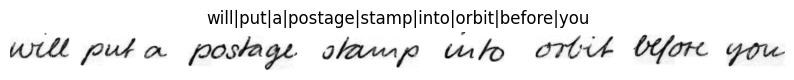

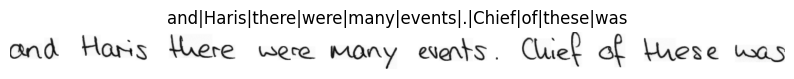

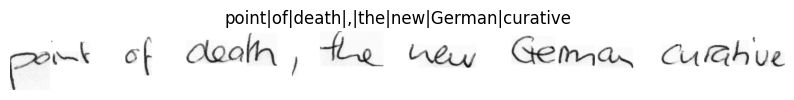

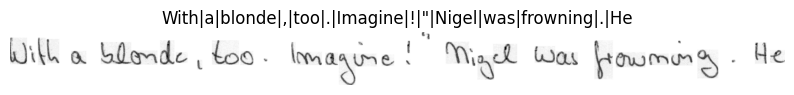

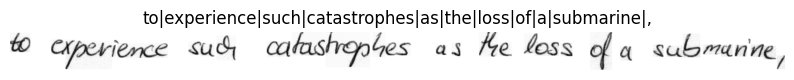

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def show_sample(idx):
    row = df.iloc[idx]
    img = Image.open(row['img_path'])
    plt.figure(figsize=(10, 2))
    plt.imshow(img, cmap='gray')
    plt.title(row['label'], fontsize=12)
    plt.axis('off')
    plt.show()

import random
for i in random.sample(range(len(df)), 5):
    show_sample(i)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11344 entries, 0 to 11343
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  11344 non-null  object
 1   label     11344 non-null  object
dtypes: object(2)
memory usage: 177.4+ KB


In [ ]:
df.isnull().sum()

,0
img_path,0
label,0


In [ ]:
df['label_length'] = df['label'].apply(len)
df['label_length'].describe()

,label_length
count,11344.000000
mean,42.970028
std,10.267891
min,1.000000
25%,38.000000
50%,43.000000
75%,49.000000
max,93.000000


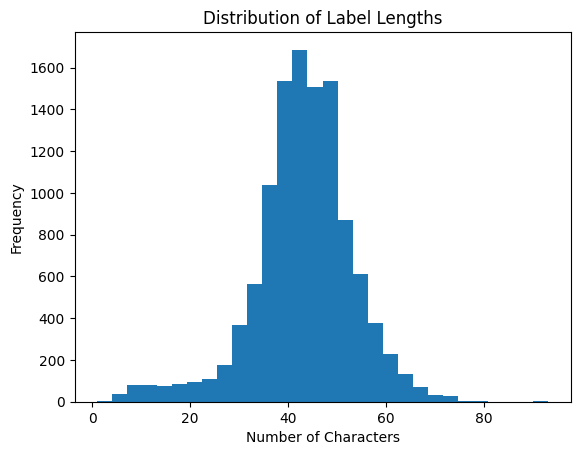

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['label_length'], bins=30)
plt.title("Distribution of Label Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

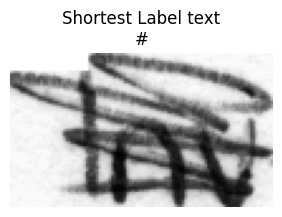

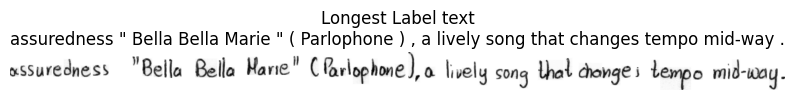

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

shortest_row = df.loc[df['label_length'].idxmin()]
longest_row = df.loc[df['label_length'].idxmax()]

def show_image_with_label(img_path, label, title):
    img = Image.open(img_path)
    plt.figure(figsize=(10, 2))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"{title}\n{label.replace('|', ' ')}", fontsize=12)
    plt.show()

show_image_with_label(shortest_row['img_path'], shortest_row['label'], "Shortest Label text")
show_image_with_label(longest_row['img_path'], longest_row['label'], "Longest Label text")

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=1/9, random_state=42)

print(f"Train set size: {len(df_train)}")
print(f"Test set size: {len(df_test)}")

Train set size: 10083
Test set size: 1261
